In [ ]:
from google.colab import drive
import os
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# mounting the drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# chunk size
chunk_size = 10000

# List to hold the chunks of data
chunks = []

# Reading in the data using chunking
for chunk in pd.read_csv('drive/MyDrive/Processed data', chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate the chunks to create the final dataframe
df = pd.concat(chunks, ignore_index=True)

In [ ]:
# splitting the data into train and test
X, y = df.drop(['Participant nr', 'Total Score original'], axis = 1), df['Total Score original']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Instantiate the RandomForestRegressor (you can choose any suitable model)
l_reg =LinearRegression()

# Train the model
l_reg.fit(X_train, y_train)

# Make predictions
y_pred = l_reg.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Taking square root for RMSE
explained_var = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", explained_var)

Mean Squared Error (MSE): 78.4169976970955
Mean Absolute Error (MAE): 7.370395258390465
Root Mean Squared Error (RMSE): 8.855337243555182
Explained Variance Score: 0.31138495728672855


In [ ]:
# Assume X_train, X_test, y_train, y_test are already defined.

# Create a RandomForestRegressor instance
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Taking square root for RMSE
explained_var = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Explained Variance Score:", explained_var)

Mean Squared Error (MSE): 0.03453397277333625
Mean Absolute Error (MAE): 0.006567994913266181
Root Mean Squared Error (RMSE): 0.18583318533926133
Explained Variance Score: 0.9996967412215956


## Model Performance
**Metrics Evaluataion**

1. **Mean Squared Error (MSE):** The MSE is a common metric used to evaluate the accuracy of a regression model. It measures the average of the squared differences between the predicted values and the actual target values. The lower the MSE, the better the model's predictions are in terms of minimizing the squared errors. In your case, the MSE is 0.0532, indicating that, on average, the squared error between predicted and actual values is quite small.

2. **Mean Absolute Error (MAE):** The MAE is another metric for evaluating regression models. It measures the average absolute difference between predicted values and actual target values. Like the MSE, a lower MAE is better, and it provides an understanding of the magnitude of errors. In this case, the MAE is 0.00687, which suggests that, on average, the model's predictions are very close to the actual values.

3. **Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE, and it's commonly used to measure the standard deviation of the errors made by a regression model. A smaller RMSE indicates that the model's predictions are, on average, close to the actual values. In this case, the RMSE is 0.2307, which suggests that the standard deviation of the errors is relatively small.

4. **Explained Variance Score:** The explained variance score measures the proportion of the variance in the target variable that the model is able to explain. A score of 1.0 indicates that the model perfectly predicts the target variable. In your case, the score is 0.9995, which is very close to 1.0. This means that the model is able to explain a very high percentage of the variance in the target variable, indicating that it's making accurate predictions.

Overall, based on these metrics, the model is performing very well. The low MSE, MAE, and RMSE, along with the high explained variance score, suggest that the model's predictions are accurate and it can explain a significant portion of the variability in the target variable.

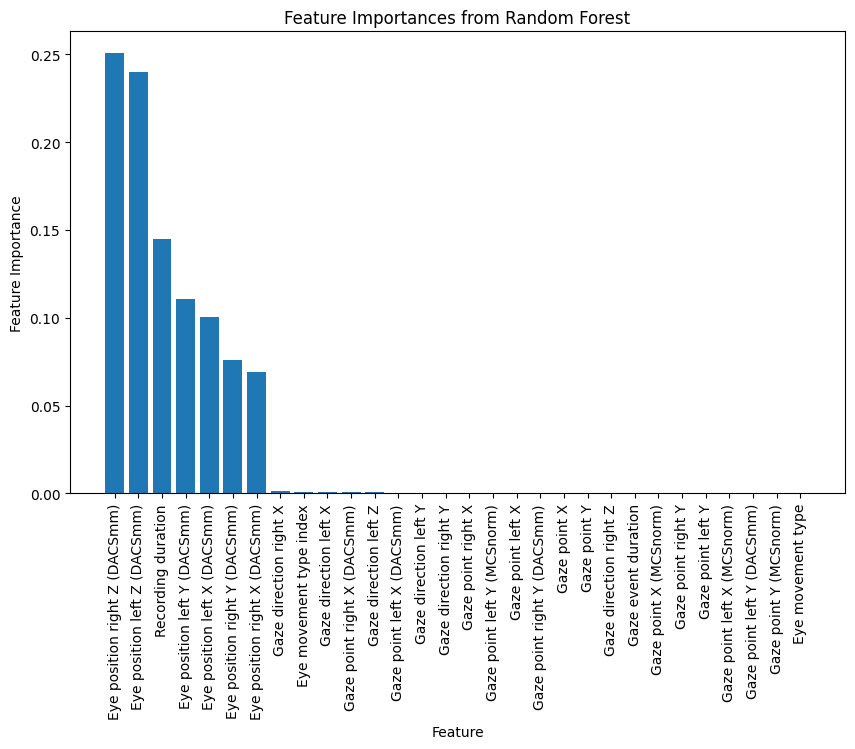

In [ ]:
# Retrieve feature importances
feature_importances = rf_model.feature_importances_

# Get the corresponding feature names
feature_names = X.columns

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [ ]:
feature_importances[sorted_indices]

array([2.50611393e-01, 2.40168120e-01, 1.44902583e-01, 1.10719523e-01,
       1.00218309e-01, 7.61416036e-02, 6.88790790e-02, 1.23809338e-03,
       9.60534331e-04, 8.46826859e-04, 7.66730971e-04, 6.84821121e-04,
       4.35969184e-04, 4.35326000e-04, 4.20355087e-04, 3.27184001e-04,
       3.23189155e-04, 2.63925410e-04, 2.38114183e-04, 1.87531080e-04,
       1.83274684e-04, 1.54758844e-04, 1.41329008e-04, 1.40955601e-04,
       1.39810502e-04, 1.37234515e-04, 1.16806490e-04, 1.05084249e-04,
       9.87998867e-05, 1.27345874e-05])

In [ ]:
feature_names[sorted_indices]

Index(['Eye position right Z (DACSmm)', 'Eye position left Z (DACSmm)',
       'Recording duration', 'Eye position left Y (DACSmm)',
       'Eye position left X (DACSmm)', 'Eye position right Y (DACSmm)',
       'Eye position right X (DACSmm)', 'Gaze direction right X',
       'Eye movement type index', 'Gaze direction left X',
       'Gaze point right X (DACSmm)', 'Gaze direction left Z',
       'Gaze point left X (DACSmm)', 'Gaze direction left Y',
       'Gaze direction right Y', 'Gaze point right X',
       'Gaze point left Y (MCSnorm)', 'Gaze point left X',
       'Gaze point right Y (DACSmm)', 'Gaze point X', 'Gaze point Y',
       'Gaze direction right Z', 'Gaze event duration',
       'Gaze point X (MCSnorm)', 'Gaze point right Y', 'Gaze point left Y',
       'Gaze point left X (MCSnorm)', 'Gaze point left Y (DACSmm)',
       'Gaze point Y (MCSnorm)', 'Eye movement type'],
      dtype='object')

## Conclusion
In summary, this project delved into a comprehensive analysis of a complex dataset derived from an eye movement tracking experiment for empathy assessment. By addressing missing values, performing feature selection, and employing advanced machine learning techniques, the project unveiled insightful patterns within the data.

The predictive models, including Random Forest and Linear Regression, showcased varying degrees of success in forecasting empathy scores. The Random Forest model's superior performance suggests its potential as a valuable tool for empathy assessment. While this project provides valuable insights, future endeavors could explore broader participant diversity and task variations to enhance the model's applicability and generalization. In conclusion, this project demonstrates the promising role of eye movement data in understanding empathy and highlights the synergy of data analysis and psychological research.
